In [423]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from scipy import stats

## Aplicando el algoritmo de aceptación y rechazo se pide: 

##A) Generar 2 distribuciones normales independientes:
*   Una con media 10 y desvio 2
*   Una con media 20 y desvio 15


El algoritmo de aceptación y rechazo consiste en dado una Y con funcion de densidad conocida fY(t), queremos generar una X con fX(t).

Para poder utilizar este metodo, tenemos un solo requisito que cumplir : 
* El soporte de ambas funciones de distribucion tienen que coincidir.

1) Inicialmente tomamos X: N (μ= 0, σ=1) tomando de soporte una exponencial Y :Exp(λ=1). Para que ambos soportes coincidan, vamos a utilizar la mitad de la campana de Gauss, ya que al ser simetrica despues simplemente podemos reacomodar los valores positivos y negativos. 

2) Luego,  se debe encontrar el valor máximo (c). Para encontrar el valor de c, calculamos fX(t)/fY (t). Derivando e igualando a 0, nos da como resultado: 

* t= 1
* c= fX (t)/fY (t) =  1.3aprox.


3) En cada iteración, se genera un número random x con distribución Exp(λ = 1) y vemos si es aceptado o no. Se calcula la probabilidad de aceptar como: 
* p = fX (t)/c ∗ fY (t)

Si se acepta el número generado, entonces con probabilidad 1/2 se le cambia el signo (para reacomodar). 


4) Finalmente para generar las distribuciones normales solicitadas:
* X1: N (μ= 10, σ=2)
* X2: N (μ= 20, σ=15)
 en el ejercicio vamos a ajustarlas a la estandar, le vamos a sumar la media y multiplicar por el desvio.







In [424]:
# Funcion de densidad - Normal(μ, σ),
def normal(t, media, desvio):
  return math.exp(-((t - media) **2) / 2* ((desvio)** 2)) / math.sqrt(2 * math.pi * desvio)

In [425]:
# Funcion de densidad - Exponencial (λ)
def exponencial(t, lamda):
  return lamda * math.exp(-lamda * t)

In [426]:
# Probabilidad de aceptar o rechazar:  p = fX(t)/ c ∗ fY(t)
def probabilidad_aceptar(t):
  c = math.sqrt(2 * math.exp(1) / math.pi) 
  return normal(t, 0, 1) / (c * exponencial(t, 1))

In [427]:
def metodo_aceptacion_rechazo(n):
  resultados = [] 
  for i in range(n):
    u1 = np.random.rand() #Genero un valor random con dist uniforme
    y1 = np.random.exponential() #Genero un valor random con dist exponencial

    if (u1 <= probabilidad_aceptar(y1)): #Acepto muestra
      lado = np.random.rand()

      if (lado < 0.5): # lado izquierdo
        resultados.append(-y1)

      else:          # lado derecho
        resultados.append(y1)

  return resultados

## B) Muestre graficamente las distribuciones de numeros al azar generadas.

### CASO 1 - Media = 10 y Desvio = 2

/home/marcos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma y funcion de densidad de Normal con media 10 y desvio 2')

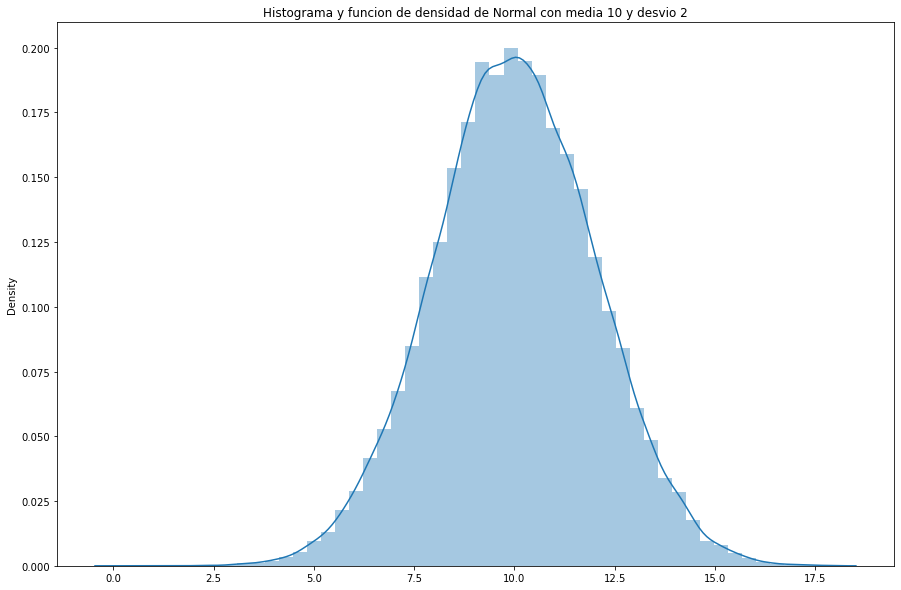

In [428]:
numeros_generados1 = metodo_aceptacion_rechazo(100000)
resultado_final1 = [10 + 2*x for x in numeros_generados1]
plt.figure(figsize=(15, 10))
g = sns.distplot(resultado_final1,bins=50,hist=True)
plt.title('Histograma y funcion de densidad de Normal con media 10 y desvio 2')



### CASO 2 - Media = 20 y Desvio = 15

/home/marcos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1080 with 0 Axes>

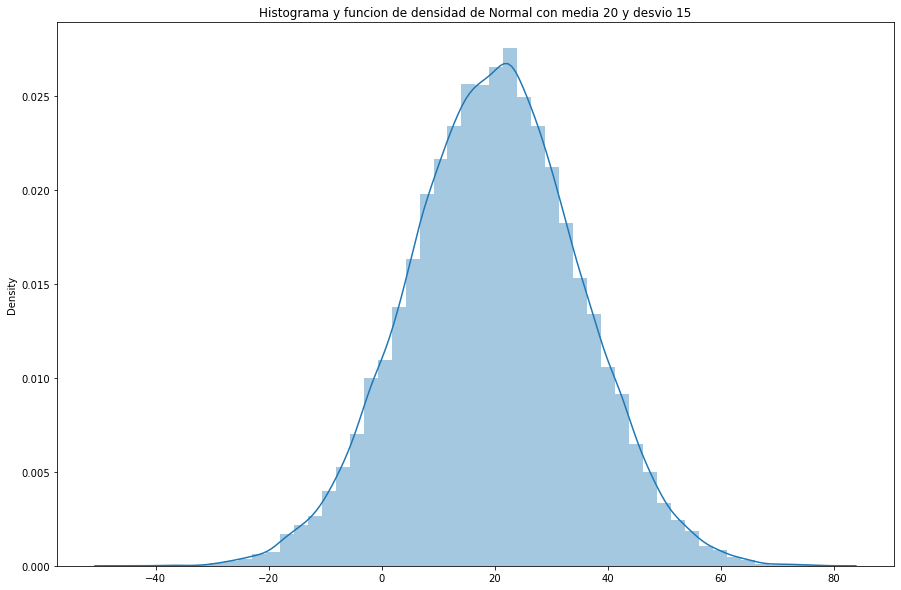

<Figure size 1440x1080 with 0 Axes>

In [429]:
numeros_generados2 = metodo_aceptacion_rechazo(100000)
resultado_final2 = [20 + 15*x for x in numeros_generados2] 
plt.figure(figsize=(15, 10))
g = sns.distplot(resultado_final2,bins=50,hist=True)
plt.title('Histograma y funcion de densidad de Normal con media 20 y desvio 15')
plt.figure(figsize=[20,15])

## C) Calcular la media y la varianza de la distribucion obtenidas y compararlos con los valores teoricos


### CASO 1 - Media = 10 y Desvio = 2

In [430]:
print("Los valores teoricos son:")
print("Media: 10 ")
print("Varianza: 4")

print("Los valores obtenidos son:")
print("Media: " + str(np.mean(resultado_final1)))
print("Varianza: " + str(np.var(resultado_final1)))

Los valores teoricos son:
Media: 10 
Varianza: 4
Los valores obtenidos son:
Media: 10.001696108156684
Varianza: 4.040960673890595



### CASO 2 - Media = 20 y Desvio = 15

In [431]:
print("Los valores teoricos son:")
print("Media: 20 ")
print("Varianza: 225")

print("Los valores obtenidos son:")
print("Media: " + str(np.mean(resultado_final2)))
print("Varianza: " + str(np.var(resultado_final2)))

Los valores teoricos son:
Media: 20 
Varianza: 225
Los valores obtenidos son:
Media: 19.891841362582113
Varianza: 224.96127668184107


#### Como podemos observar, en ambos casos los valores teoricos con los obtenidos son muy aproximados. 

## D) Utilizar las distribuciones generadas en el punto A) para generar una distribucion normal bivariada. 


* X1: N (μ= 10, σ=2)
* X2: N (μ= 20, σ=15)

Dado (X1, X2) ∼ N(μ1, μ2, σ1^2, σ2^2, ρ) - X1 e X2 son independientes ⇔ ρ(coeficiente de correlacion) = 0

Como las dos distribuciones son independientes podemos decir que una distribucion normal bivariada es el producto de sus funciones de densidad.

In [432]:
def largos(normal1, normal2):
  largo = min(len(normal1), len(normal2))
  norm1 = []
  norm2 = []
  for i in range (largo):
    norm1.append(normal1[i])
    norm2.append(normal2[i])
  return norm1, norm2

Text(0.5, 1.0, 'Coeficiente de correlación')

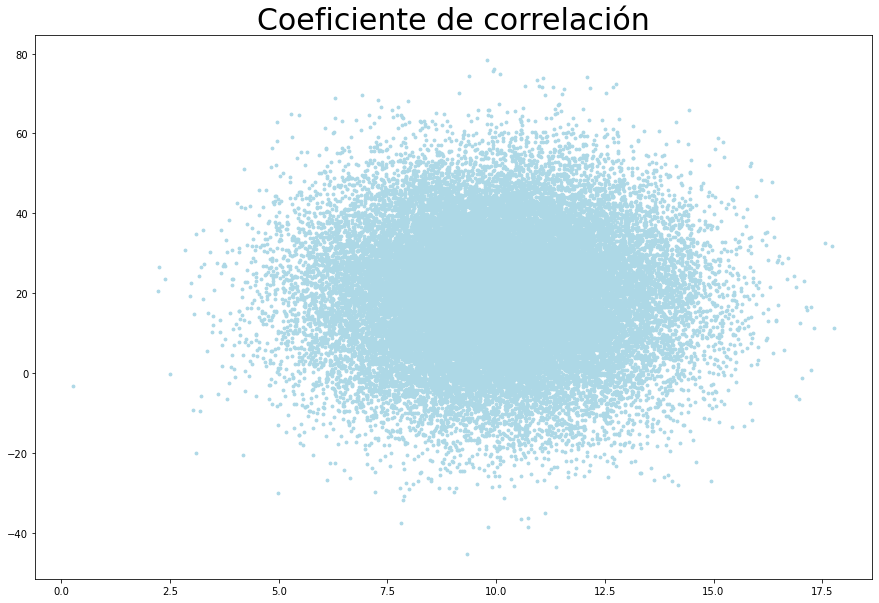

In [433]:
normal_1, normal_2 = largos(resultado_final1, resultado_final2)
plt.figure(figsize=(15, 10))
plt.scatter(normal_1, normal_2, s=8, color = 'lightblue')
plt.title('Coeficiente de correlación', fontsize = 30)

#### Como esperabamos, en este grafico queda demostrado que el coeficiente de correlación es 0. De esta manera demostramos que las normales generadas en el item A) son efectivamente independientes. 


In [434]:
print(resultado_final1)
print(resultado_final2)

[10.523300838837596, 9.443123765088131, 9.635945418040068, 13.319882374090536, 12.937120537607207, 11.277060037467475, 8.487477453416336, 11.552342533030277, 9.099327116657404, 8.17337628660985, 8.18468677034437, 7.883626400696964, 8.90254152377723, 8.732889842944322, 10.272597936701331, 9.801039564827516, 12.356815826441593, 8.982377016362559, 13.556808827487279, 10.101994826460098, 9.385124565999929, 11.707320068234674, 9.476694565423653, 11.995842733467557, 12.691130746842754, 8.601814168012023, 7.184721347870003, 8.71994114366339, 10.530714969971948, 9.516859112460297, 4.921040800485276, 6.251211586992474, 11.464461162359875, 10.567917900490768, 11.020360379513779, 12.075194525986653, 12.366616881850938, 6.916411477098086, 9.811647144223821, 9.835867952978033, 10.553250511160625, 10.453263161781114, 12.115992927394874, 7.373494642607591, 9.51817643634683, 8.691342095384783, 9.06022756447113, 8.556076038707559, 9.732308760042113, 12.20300017520763, 12.125877384934434, 10.06994425857

In [435]:
def normal_bivariada(normal1, normal2):

  largo = min(len(normal1), len(normal2))
  bivariada = []

  for i in range (largo):
    bivariada.append(normal1[i]*normal2[i])
  return bivariada

## E) Graficar la distribucion obtenida en el punto D). 


In [436]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [437]:
numeros_g1 = metodo_aceptacion_rechazo(10000)
resultado_f1 = [10 + 2*x for x in numeros_g1] 

In [438]:
numeros_g2 = metodo_aceptacion_rechazo(10000)
resultado_f2 = [20 + 15*x for x in numeros_g2] 

In [439]:
resultado_f1 = resultado_f1[:min(len(resultado_f1), len(resultado_f2))]
resultado_f2 = resultado_f2[:min(len(resultado_f1), len(resultado_f2))]

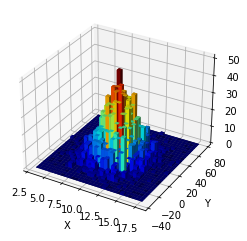

In [440]:
import matplotlib.cm as cm

x = np.array(resultado_f1)
y = np.array(resultado_f2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(30,30))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')
max_height = np.max(dz)   
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Puede verse que el histograma generado es el caracteristico de las normales bivariadas, con su peculiar campana central. 

Puede verse que el histograma generado es el caracteristico de las normales bivariadas, con su peculiar campana central. 